In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
os.getcwd()

'c:\\Users\\jjm\\Desktop\\vsCode\\2period'

In [3]:
df0 = pd.read_csv('./data/data_iris.csv')

In [5]:
df0.shape

(150, 5)

In [7]:
# list는 데이터 안에 여러 자료형이 들어가도 됨
# numpy는 데이터들의 자료형이 동일함
# Series를 묶어서 DataFrame을 만듬
# Series의 경우 pandas에서 제공하는 데이터타입인데, index가 있는 1차원 배열이라고 생각하면 좋다. 
# 문자, 논리형, 숫자 모든 데이터타입이 들어갈 수 있다. dataframe의 한 컬럼, 한 컬럼이 series이다.

df0.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df0.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
Y = df0.loc[:,'Species']  # 동일 df0.loc[:, 4]    df0.Species

In [9]:
Y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: Species, Length: 150, dtype: object

In [10]:
df = df0.drop(columns='Species')
df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
df.mean(axis=0)  # 세로 방향 평균

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [12]:
np.round(df.describe(), 2)  # 다양한 정보를 한번에 볼 수 있음

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [13]:
Y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [14]:
type(Y)

pandas.core.series.Series

In [15]:
Y.value_counts()['setosa']

50

In [16]:
Y.value_counts().index

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [17]:
df['Sepal.Length'].corr(df['Petal.Width'])  # corr는 상관계수 확인

0.8179411262715757

In [18]:
np.round(df.corr(),2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.00,-0.12,0.87,0.82
Sepal.Width,-0.12,1.00,-0.43,-0.37
Petal.Length,0.87,-0.43,1.00,0.96
Petal.Width,0.82,-0.37,0.96,1.00


In [19]:
df.corrwith(df['Sepal.Length'])  # 특정 columns과의 상관계수

Sepal.Length    1.000000
Sepal.Width    -0.117570
Petal.Length    0.871754
Petal.Width     0.817941
dtype: float64

In [20]:
df0[df0.Species == 'setosa'].mean(axis=0)  # 특정 컬럼을 가져와 평균을 구함

Sepal.Length    5.006
Sepal.Width     3.428
Petal.Length    1.462
Petal.Width     0.246
dtype: float64

In [21]:
df0.groupby('Species').mean()  #  컬럼명으로 그룹지어 평균을 구함

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [22]:
type(df0.groupby('Species'))

pandas.core.groupby.generic.DataFrameGroupBy

In [23]:
df.shape

(150, 4)

In [24]:
df.loc[5:10,['Sepal.Length','Sepal.Width']]  # 특정 컬럼 가져오기

,Sepal.Length,Sepal.Width
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1
10,5.4,3.7


In [25]:
df.iloc[10,0] = np.nan   # 일부러 결측치를 넣어줌 
df.iloc[32,2] = np.nan
df.iloc[17,2] = np.nan
df.iloc[129,2] = np.nan

In [26]:
np.round(df.describe(), 2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,149.00,150.00,147.00,150.00
mean,5.85,3.06,3.78,1.20
std,0.83,0.44,1.75,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.40,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [27]:
df.mean(axis=0, skipna=False) # 결측치를 배제하지 않고 계산 
                              # 결측치에 어떤 연산을 하든 NaN이 됨 ex) nan + 1 = nan

Sepal.Length         NaN
Sepal.Width     3.057333
Petal.Length         NaN
Petal.Width     1.199333
dtype: float64

In [28]:
df.isnull().sum(axis=0) # 결측치 개수를 파악

Sepal.Length    1
Sepal.Width     0
Petal.Length    3
Petal.Width     0
dtype: int64

In [29]:
# df.dropna(axis=0, inplace=True) # 결측치가 들어가있는 행 제거

In [30]:
df.count()

Sepal.Length    149
Sepal.Width     150
Petal.Length    147
Petal.Width     150
dtype: int64

In [31]:
# df['Sepal.Length'] = df['Sepal.Length'].fillna(value=0) # 결측치를 채워줌 0으로 채우는것은 좋은 방법은 아님
# df.count()

In [34]:
df['Sepal.Length'] = df['Sepal.Length'].fillna(value=df['Sepal.Length'].mean())
df['Petal.Length'] = df['Petal.Length'].fillna(value=df['Petal.Length'].mean()) # 결측치를 평균으로 채워 넣음

In [35]:
df.count()  # 평균 말고도 최빈값으로 채워넣는 방법도 있음

Sepal.Length    150
Sepal.Width     150
Petal.Length    150
Petal.Width     150
dtype: int64

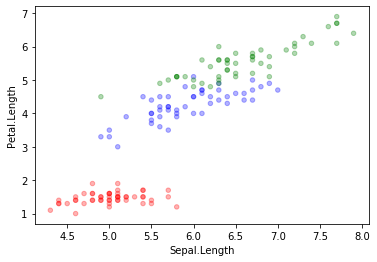

In [67]:
df0.plot.scatter(x='Sepal.Length', y='Petal.Length', color=my_colors, alpha=0.3, marker='o')
plt.show()

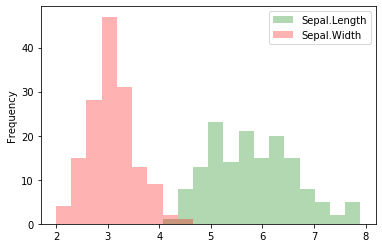

In [51]:
df0[['Sepal.Length','Sepal.Width']].plot.hist(bins=20, color=['green','red'], alpha=0.3)  #bins??
plt.show()

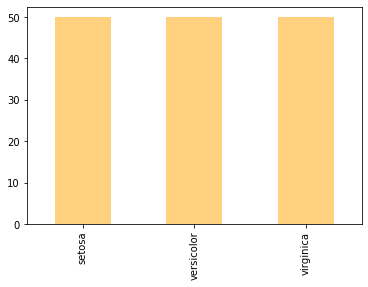

In [42]:
Y.value_counts().plot.bar(color='orange', alpha=0.5)  # Series
plt.show()

In [44]:
freq = Y.value_counts()

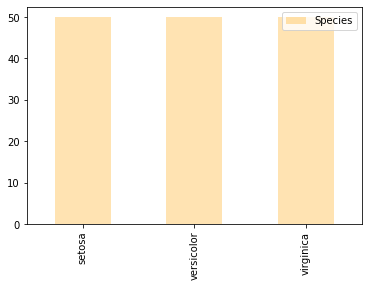

In [46]:
pd.DataFrame(freq).plot.bar(color='orange',alpha=0.3)  # DataFrame

In [53]:
my_cols_dict = {'setosa':'red','virginica':'green','versicolor':'blue'}

In [56]:
my_colors = df0.Species.apply(lambda x : my_cols_dict[x])

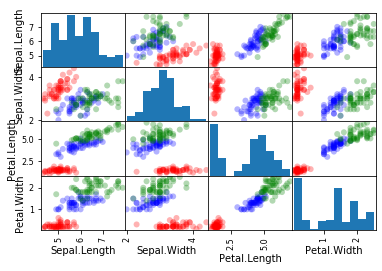

In [63]:
pd.plotting.scatter_matrix(df0, color=my_colors, marker='o',alpha=0.3)  # 산점도 행렬
plt.show()